In [1]:
import pandas as pd
import numpy as np

## Upload Data (Extenstion reports and USDA official reports)

### Upload Extension Reports (Offline)


In [2]:
TEST0=pd.read_excel('CTEST_102.xlsx', sheet_name='CTEST_102')
ext_report=TEST0["Content"]. values. tolist()

### Upload USDA Official Reports (Offline)

In [23]:
usda_official=pd.read_csv('df_pdf.csv')
# usda_official.head(5)

## Feature Selection using TF/IDF (using USDA official reports)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer(min_df=200)   # min_df is a hyperparameter that may need to optimize
X = TV.fit_transform(usda_official['test']).toarray()
# y = data.as_matrix(["TEST2"])
print(np.shape(X))
print(X)

(233, 167)
[[0.00540132 0.0113718  0.00540132 ... 0.00264356 0.02313708 0.10532581]
 [0.0047956  0.01009653 0.0047956  ... 0.0023471  0.0205424  0.10790097]
 [0.00597025 0.0125696  0.00597025 ... 0.00292201 0.02557411 0.08059833]
 ...
 [0.02381237 0.01253348 0.02381237 ... 0.01165446 0.         0.1785928 ]
 [0.02868101 0.         0.02868101 ... 0.01403731 0.         0.17208604]
 [0.02652432 0.04188269 0.02652432 ... 0.01298176 0.02840485 0.17240807]]


# Machine Learning

### Preprocessing (output coding)

In [6]:
import tensorflow as tf
from sklearn.utils.multiclass import unique_labels

In [28]:
############################# Turn label to integer
usda_official["label"]=usda_official["label"].astype('category')
usda_official["label_coded"] = usda_official["label"].cat.codes
usda_official.head(5)
############################# Number of lables
no_lables = len(pd.unique(usda_official["label_coded"]))
##############################
y=np.array(usda_official["label_coded"])
y = tf.keras.utils.to_categorical(y, num_classes=no_lables)

### Preprocessing (create train and test data)

In [30]:
mask = np.random.rand(len(usda_official)) < 0.9
########################input
x_train = X[mask]
x_val= X[~mask]
########################output
y_train=y[mask]
y_val=y[~mask]

### Fit prediction model

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [36]:
# A simple FF neural network structure
model = Sequential()
model.add(Dense(70, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(no_lables, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 70)                11760     
                                                                 
 dense_5 (Dense)             (None, 21)                1491      
                                                                 
Total params: 13,251
Trainable params: 13,251
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epochs = 50
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs)
# history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


Epoch 1/50
7/7 [==============================] - 3s 90ms/step - loss: 3.0435 - accuracy: 0.0524 - val_loss: 3.0327 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 21ms/step - loss: 3.0075 - accuracy: 0.1143 - val_loss: 3.0072 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 21ms/step - loss: 2.9753 - accuracy: 0.1571 - val_loss: 2.9799 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 20ms/step - loss: 2.9430 - accuracy: 0.1810 - val_loss: 2.9498 - val_accuracy: 0.0870
Epoch 5/50
7/7 [==============================] - 0s 25ms/step - loss: 2.9093 - accuracy: 0.3095 - val_loss: 2.9158 - val_accuracy: 0.1739
Epoch 6/50
7/7 [==============================] - 0s 19ms/step - loss: 2.8755 - accuracy: 0.3810 - val_loss: 2.8848 - val_accuracy: 0.1739
Epoch 7/50
7/7 [==============================] - 0s 20ms/step - loss: 2.8412 - accuracy: 0.4143 - val_loss: 2.8556 - val_accuracy: 0.1739
Epoch 8/50
7/7 

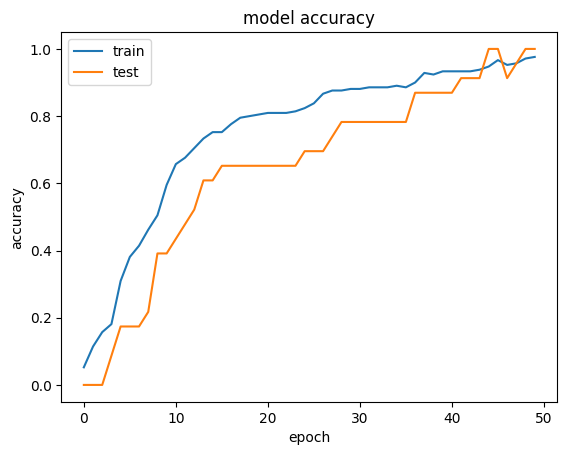

In [40]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

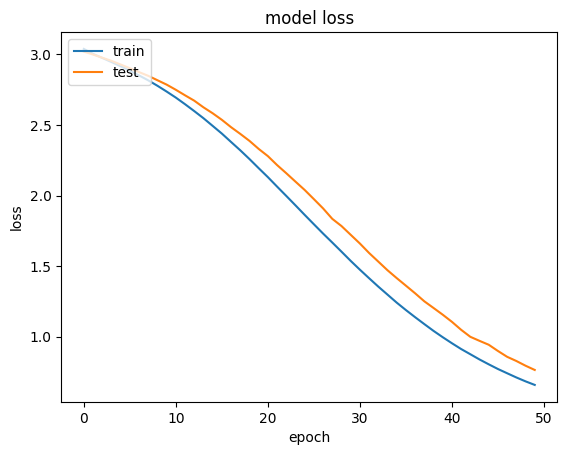

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Making Prediction  (on some sample validation set data from USDA offical reports)

In [42]:
######################################
# Create hash table to be used for plots....
######################################
from sklearn.utils.multiclass import unique_labels
A=unique_labels(y_train)
B=unique_labels(usda_official["label"])
LABELS=pd.DataFrame()
LABELS["coded"]=list(A)
LABELS["category"]=list(B)

In [43]:
y_prob=model.predict(x_val[10].reshape(1,x_train.shape[1]))
y_classes = y_prob.argmax(axis=-1)
print("\n****************************************************")
print("\n The predicedt class label is:", y_classes,"\n")
print("\n****************************************************")
print("This is equivalent to:", LABELS.iloc[y_classes[0],1],"\n")
print("\n****************************************************")
print("The full class probability is:", y_prob,"\n")


1/1 [==============================] - 0s 136ms/step

****************************************************

 The predicedt class label is: [0] 


****************************************************
This is equivalent to: Acreage 


****************************************************
The full class probability is: [[0.32488906 0.0236608  0.06870078 0.00034165 0.01415882 0.00902642
  0.03978389 0.00442708 0.04431203 0.2208755  0.07352155 0.01145859
  0.01683035 0.00492478 0.00473948 0.01728125 0.05431839 0.05639487
  0.00372097 0.00516901 0.00146469]] 



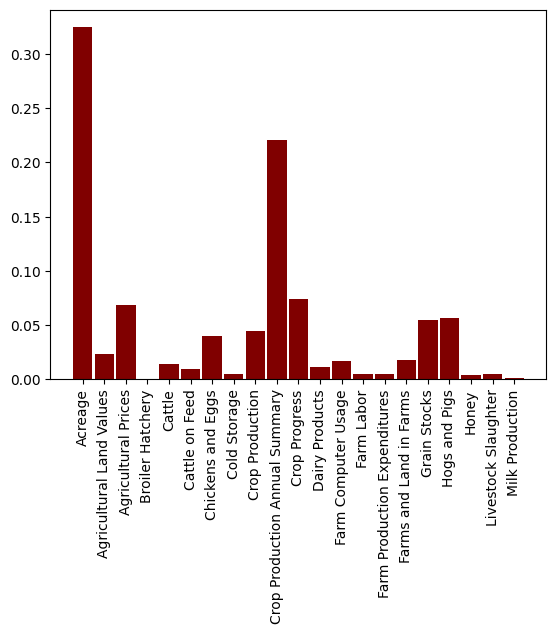

In [44]:
# plot all probabilities
label=list(LABELS["category"])
values=np.array(y_prob).reshape(-1)
plt.bar(label,values,color ='maroon', width = 0.9)
plt.xticks(range(len(label)), label, rotation='vertical')
plt.show()

## Making Prediction on a separate test set from extension reports 

1/1 [==============================] - 0s 60ms/step


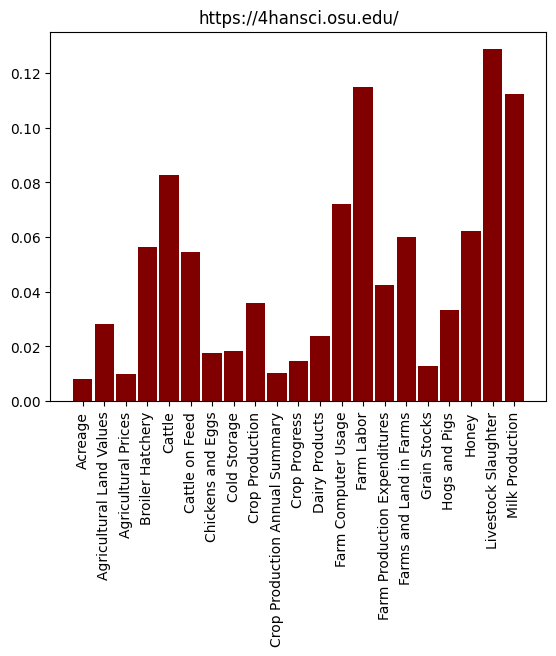

In [46]:
# to make prediction on a test set just need to provide the name of teh assoctiated CSV file, i.e. "TEST_EXT" on the line below


# upload the test extension report text files
TEST_EXT=pd.read_csv('TEST_EXT.csv')
x_test_base=TEST_EXT['content']. values. tolist()

# apply TF/IDF feature transfromation
x_test2 = TV.transform(x_test_base).toarray()

# y_prob=model.predict(x_test2.reshape(len(x_test2),x_train.shape[1]))
for i in range(len(x_test2)):
    y_prob=model.predict(x_test2[i].reshape(1,x_train.shape[1]))
    # plot all probabilities
    plt.title(str(name[i]))
    values=np.array(y_prob).reshape(-1)
    plt.bar(label,values,color ='maroon', width = 0.9)
    plt.xticks(range(len(label)), label, rotation='vertical')
    plt.show()